In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\data\demo_data\8.twospirals.csv",header=None)

In [3]:
data.shape

(2000, 3)

In [4]:
data.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

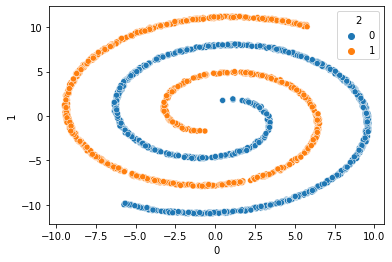

In [5]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [6]:
data[2].value_counts()

0    1000
1    1000
Name: 2, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [9]:
x_train.shape

(1800, 2)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
std=StandardScaler()

In [12]:
stdd=std.fit_transform(x_train)

In [15]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import tensorflow

In [17]:
import tensorflow.keras 

In [18]:
from tensorflow.keras import Sequential

In [19]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(5,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [20]:
model=Sequential()
model.add(Dense(25,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.7))
model.add(Dense(25,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(25,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(25,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.7))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 batch_normalization (BatchN  (None, 25)               100       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 batch_normalization_1 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 batch_normalization_2 (Batc  (None, 25)               1

In [22]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
save=model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
144/144 [==============================] - 7s 10ms/step - loss: 0.5880 - accuracy: 0.6847 - val_loss: 0.5958 - val_accuracy: 0.5639
Epoch 2/20
144/144 [==============================] - 1s 5ms/step - loss: 0.5171 - accuracy: 0.7597 - val_loss: 0.3392 - val_accuracy: 0.8528
Epoch 3/20
144/144 [==============================] - 1s 5ms/step - loss: 0.4422 - accuracy: 0.8049 - val_loss: 0.2513 - val_accuracy: 0.9361
Epoch 4/20
144/144 [==============================] - 1s 5ms/step - loss: 0.4477 - accuracy: 0.7965 - val_loss: 0.2121 - val_accuracy: 0.9361
Epoch 5/20
144/144 [==============================] - 1s 5ms/step - loss: 0.4365 - accuracy: 0.8229 - val_loss: 0.1883 - val_accuracy: 0.9528
Epoch 6/20
144/144 [==============================] - 1s 5ms/step - loss: 0.4520 - accuracy: 0.8090 - val_loss: 0.1910 - val_accuracy: 0.9694
Epoch 7/20
144/144 [==============================] - 1s 5ms/step - loss: 0.4022 - accuracy: 0.8458 - val_loss: 0.1542 - val_accuracy: 0.9750
Epoch

In [24]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

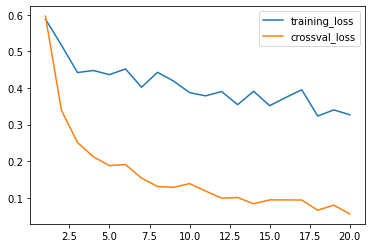

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),tl,label="training_loss")
plt.plot(range(1,21),cvl,label="crossval_loss")
plt.legend()

In [26]:
predi=model.predict(x_train)

57/57 [==============================] - 1s 2ms/step


In [27]:
import numpy as np

In [28]:
preict=np.where(predi>0.5,1,0).flatten()

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_train,preict)


0.9977777777777778

In [31]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 9s 2ms/step


<AxesSubplot:>

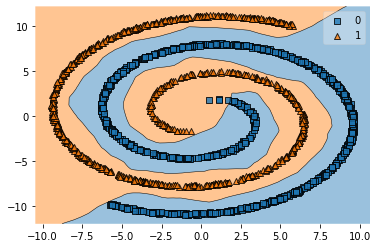

In [32]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)